In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf #폰트 다운로드


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

(965, 3) Index(['서울시 기준일', '서울시 추가 확진', '전국 추가 확진'], dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


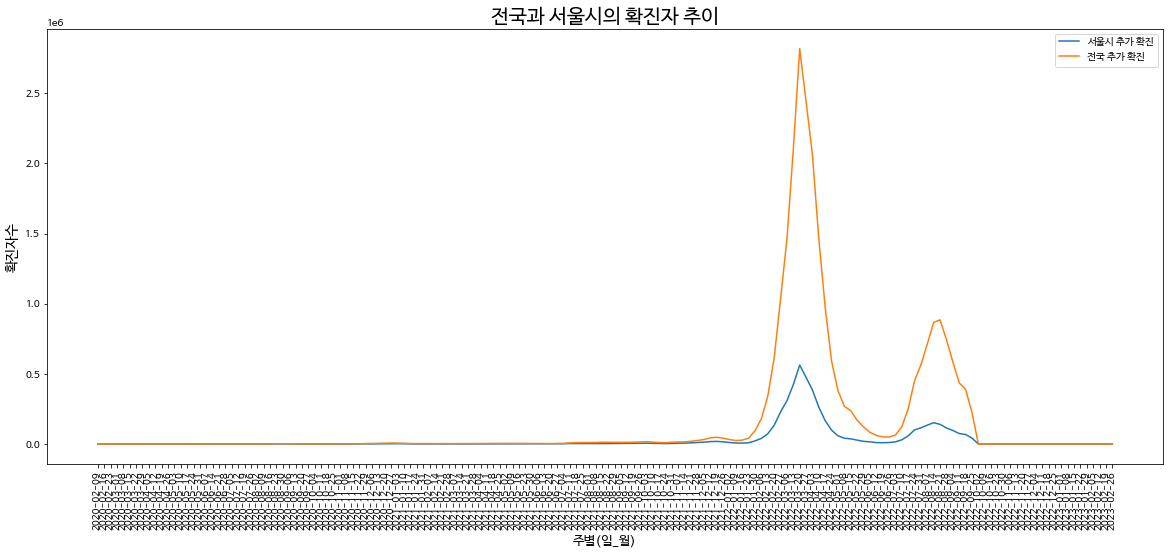

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np                                                                               #라이브러리 불러오기

df_raw = pd.read_csv('/서울시 코로나19 확진자 발생동향.csv',encoding='cp949')
df_raw.shape
df_raw.columns #칼럼 확인
df=df_raw[['서울시 기준일','서울시 추가 확진', '전국 추가 확진']]
print(df.shape,df.columns)

df['서울시 기준일']=pd.to_datetime(df['서울시 기준일'])     #서울시기준일을 OBJECT에서  datetime으로 바꿈 자료형 변경 object로 하면 시간으로 인식을 못함
df_pivot= df.pivot_table(index='서울시 기준일',values=['서울시 추가 확진', '전국 추가 확진'])
df_pivot #인덱스에다가 서울시 추가확진이랑 전국추가확진 정보 저장(피벗테이블)

weekly_covid=df_pivot.resample('W').sum() #일주일씩으로 바꾸기
weekly_covid

plt.rc('font', family='NanumBarunGothic')                                               #한글 안깨지게..
plt.rcParams['axes.unicode_minus'] = False

df_name=weekly_covid.columns

df_name

plt.figure(figsize=(20,8))#그래프 크기
for df in df_name:
    plt.plot(weekly_covid[df],label=df)
    plt.legend()
    plt.title('전국과 서울시의 확진자 추이',fontsize=20)
    plt.xlabel('주별(일_월)',fontsize=13)
    plt.ylabel('확진자수',fontsize=14)
    plt.xticks(weekly_covid.index.to_list(),rotation=90)
